In [47]:
# %matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams

labelsize = 10
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
rcParams['axes.labelsize'] = labelsize 
plt.rcParams["figure.figsize"] = (3.5,3)

In [48]:
fe = pd.read_excel("/home/kkotzen/tmp/results/ff930dbbe78b4fe1882a4a45c1e6f306.xlsx")
dts = pd.read_excel("/home/kkotzen/tmp/results/ff930dbbe78b4fe1882a4a45c1e6f306.xlsx")
wav = pd.read_excel("/home/kkotzen/tmp/results/ff930dbbe78b4fe1882a4a45c1e6f306.xlsx")

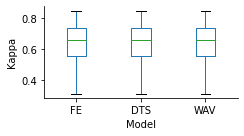

In [50]:
df = pd.DataFrame({"FE": fe["Kappa:"].values, "DTS": dts["Kappa:"].values, "WAV": wav["Kappa:"].values})
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
df.boxplot(ax = ax, showfliers=False)
plt.grid(False)
ax.set_xlabel('Model')
ax.set_ylabel("Kappa")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('/home/kkotzen/images/sleep_paper/fig-performance_boxplot.png')

In [4]:
import pickle
from sklearn.metrics import cohen_kappa_score
ppg_ihr_dict = pickle.load(open("/home/kkotzen/tmp/results/18bd2c4d689f4c64ad26a5879d27f44c.pkl", 'rb'))
ppg_features_dict = pickle.load(open("/home/kkotzen/tmp/results/f2151e48b8354c4bab0cb25a084c42ef.pkl", 'rb'))
ecg_ihr_dict = pickle.load(open("/home/kkotzen/tmp/results/71dfe0fafd3f435da8aa05424b6c14f2.pkl", 'rb'))


ppg_ihr_patients = ppg_ihr_dict['patients']
ppg_ihr_preds = ppg_ihr_dict['predictions']

ppg_features_patients = ppg_features_dict['patients']
ppg_features_preds = ppg_features_dict['predictions']

ecg_ihr_patients = ecg_ihr_dict['patients']
ecg_ihr_preds = ecg_ihr_dict['predictions']

for index, row in df.iterrows():
    patient = row.ID
    patient = str(int(patient)).zfill(4)
    this_ppg_ihr_preds = ppg_ihr_preds[np.where(np.array(ppg_ihr_patients)==patient)[0][0]]
    this_ppg_features_preds = ppg_features_preds[np.where(np.array(ppg_features_patients)==patient)[0][0]]
    this_ecg_ihr_preds = ecg_ihr_preds[np.where(np.array(ecg_ihr_patients)==patient)[0][0]]
    
    shape = min(this_ppg_ihr_preds.shape[0], this_ppg_features_preds.shape[0])
    kappa = cohen_kappa_score (this_ppg_ihr_preds[0:shape], this_ppg_features_preds[0:shape])
    df.loc[index, 'PPG Match'] = kappa
    
    shape = min(this_ppg_ihr_preds.shape[0], this_ecg_ihr_preds.shape[0])
    kappa = cohen_kappa_score (this_ppg_ihr_preds[0:shape], this_ecg_ihr_preds[0:shape])
    df.loc[index, 'IHR Match'] = kappa
        

In [5]:
df.sort_values(by='PPG Match').head(20)
# df.sort_values(by='ppg_ihr-ecg_ihr').tail(20)

,ID,ppg_features,ppg_ihr,ecg_ihr,ppg_conf,ecg_ihr-ppg_features,ppg_ihr-ppg_features,ppg_ihr-ecg_ihr,max,PPG Match,IHR Match
124,4408,0.155798,-0.014077,0.020992,-0.090357,0.134806,0.169876,0.035069,0.169876,0.081952,0.248795
104,3692,0.273129,0.179900,0.162404,0.658663,0.110724,0.093229,0.017496,0.110724,0.184460,0.472844
71,2416,0.144206,0.329476,0.377514,0.437681,0.233308,0.185271,0.048037,0.233308,0.277217,0.421655
142,5000,0.572884,0.481995,0.417531,0.841348,0.155353,0.090889,0.064464,0.155353,0.305970,0.539853
180,6217,0.451099,0.326843,0.255440,0.724548,0.195659,0.124256,0.071403,0.195659,0.309150,0.195492
122,4334,0.661677,0.516658,0.611313,0.780831,0.050364,0.145019,0.094655,0.145019,0.318230,0.688882
7,368,0.229759,0.164866,0.501238,0.717559,0.271479,0.064893,0.336372,0.336372,0.352398,0.289952
119,4252,0.544906,0.332568,0.238362,0.610323,0.306543,0.212337,0.094206,0.306543,0.361111,0.394009
170,5842,0.367321,0.618274,0.616353,0.594107,0.249032,0.250953,0.001921,0.250953,0.370463,0.738928
35,1094,0.495805,0.538668,0.613353,0.920428,0.117548,0.042863,0.074685,0.117548,0.372756,0.616502


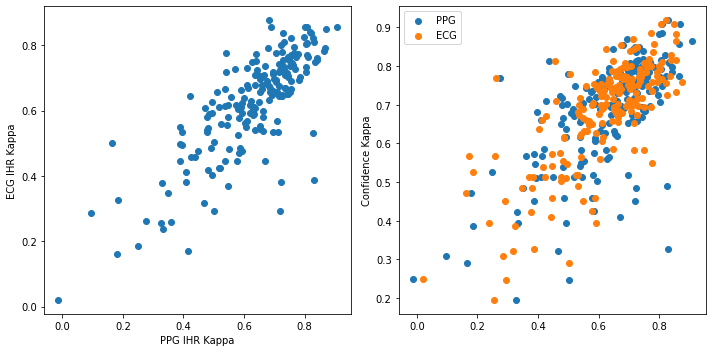

In [6]:
# PPG to ECG Match
plt.close('all')
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(df.ppg_ihr, df.ecg_ihr)
ax[1].scatter(df.ppg_ihr, df['IHR Match'], label='PPG')
ax[1].scatter(df.ecg_ihr, df['IHR Match'], label='ECG')

ax[0].set_xlabel('PPG IHR Kappa')
ax[0].set_ylabel('ECG IHR Kappa')

ax[1].set_ylabel('Confidence Kappa')
ax[1].legend()
plt.tight_layout()

# fig = plt.figure(figsize=(10,5))
# ax = fig.add_subplot(projection='3d')
# # ax2 = fig.add_subplot()

# ax.scatter(df.ppg_ihr, df.ecg_ihr, df['IHR Match'])
# ax.set_xlabel('PPG Kappa')
# ax.set_ylabel('ECG Kappa')
# ax.set_zlabel('Confidence Kappa')

plt.show()

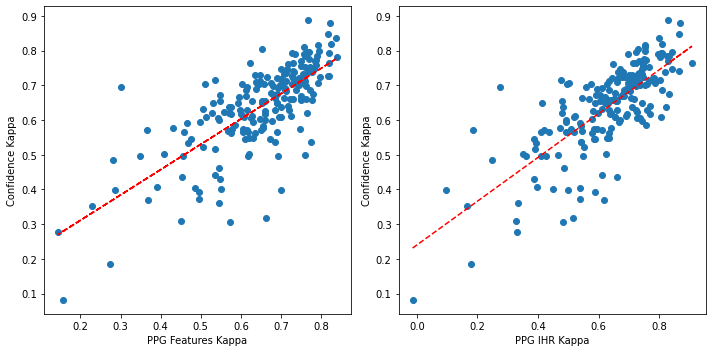

In [14]:
df = df.sort_values(by='PPG Match')
plt.close('all')
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(df.ppg_features, df['PPG Match'])

z = np.polyfit(df.ppg_features, df['PPG Match'], 1)
p = np.poly1d(z)
ax[0].plot(df.ppg_features,p(df.ppg_features),"r--")

ax[1].scatter(df.ppg_ihr, df['PPG Match'])
z = np.polyfit(df.ppg_ihr, df['PPG Match'], 1)
p = np.poly1d(z)
ax[1].plot(df.ppg_ihr,p(df.ppg_ihr),"r--")

ax[0].set_xlabel('PPG Features Kappa')
ax[0].set_ylabel('Confidence Kappa')

ax[1].set_xlabel('PPG IHR Kappa')
ax[1].set_ylabel('Confidence Kappa')
plt.tight_layout()

In [ ]:
print('All Test Patients')
display(df[['ppg_features', 'ppg_ihr']].describe())

df_high_confidence = df[df['PPG Match'] > 0.55]
print('All Test Patients')
display(df_high_confidence[['ppg_features', 'ppg_ihr']].describe())

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))
results['Kappa:'].hist(bins=20, ax=ax)
ax.set_ylabel('Number of Nights')
ax.set_xlabel("Kappa")
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))
validate['Kappa:'].hist(bins=20, ax=ax)
ax.set_ylabel('Number of Nights')
ax.set_xlabel("Kappa")
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
results['Kappa:'].hist(bins=20, ax=ax, density=True, alpha=0.65)
results['Kappa:'].plot(kind = "kde")
ax.set_xlabel("Kappa")
ax.set_yticks([])
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 1)

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = results['Kappa:'].quantile(0.05), results['Kappa:'].quantile(0.25), results['Kappa:'].quantile(0.5), results['Kappa:'].quantile(0.75), results['Kappa:'].quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 1, 0.9], [quant_25,1, 0.9], [quant_50, 1, 0.9],  [quant_75, 1, 0.9], [quant_95, 1, 0.9]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='black')
    ax.text(i[0]+0.0025, 0.1, np.around(i[0], 2), size = 8, rotation=30)

ax.text(quant_5-0.025,  4, "5th", size = 10, rotation=60)
ax.text(quant_25-0.025, 4, "25th", size = 10, rotation=60)
ax.text(quant_50-0.025, 4, "50th", size = 10, rotation=60)
ax.text(quant_75-0.025,4, "75th", size = 10, rotation=60)
ax.text(quant_95-0.025, 4, "95th", size = 10, rotation=60)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'sex']].boxplot(by='sex', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Gender")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("")
results[['Kappa:', 'sex']].groupby(by='sex').describe()

In [ ]:
age_groups = [50,60,70,80,90]
for i in range(len(age_groups)-1):
    results.loc[(results.age >=age_groups[i])&(results.age < age_groups[i+1]),'age_group'] = f'{age_groups[i]}-{age_groups[i+1]-1}'
    
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'age_group']].boxplot(by='age_group', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Age")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("") 
results[['Kappa:', 'age_group']].groupby(by='age_group').describe()

In [ ]:
ahi_groups = [0,20,40,60, 80]
for i in range(len(ahi_groups)-1):
    results.loc[(results.ahi >=ahi_groups[i])&(results.ahi < ahi_groups[i+1]),'ahi_group'] = f'{ahi_groups[i]}-{ahi_groups[i+1]-1}'
    
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'ahi_group']].boxplot(by='ahi_group', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("AHI")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("") 
results[['Kappa:', 'ahi_group']].groupby(by='ahi_group').describe()

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'hypertension']].boxplot(by='hypertension', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Hypertension")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("")
results[['Kappa:', 'hypertension']].groupby(by='hypertension').describe()

In [ ]:
"""
Metrics
'WeightedF1','Accuracy:','Kappa:','MacroF1'

Labels
'age','sex','ahi','ai','hypertension','age_group','ahi_group','Label-Wake%','Label-Light%','Label-Deep%','Label-REM%','Labels-Wake>Light','Labels-Wake>Deep','Labels-Wake>REM','Labels-Light>Wake','Labels-Light>Deep','Labels-Light>REM','Labels-Deep>Wake','Labels-Deep>Light','Labels-Deep>REM','Labels-REM>Wake','Labels-REM>Light','Labels-REM>Deep','Labels-Longest_Wake','Labels-Longest_Light','Labels-Longest_Deep','Labels-Longest_REM'

Predictions
'Predicted-Wake%','Predicted-Light%','Predicted-Deep%','Predicted-REM%','Predicted-Wake>Light','Predicted-Wake>Deep','Predicted-Wake>REM','Predicted-Light>Wake','Predicted-Light>Deep','Predicted-Light>REM','Predicted-Deep>Wake','Predicted-Deep>Light','Predicted-Deep>REM','Predicted-REM>Wake','Predicted-REM>Light','Predicted-REM>Deep','Predicted-Longest_Wake','Predicted-Longest_Light','Predicted-Longest_Deep','Predicted-Longest_REM'
"""

In [ ]:
from pandas.plotting import scatter_matrix
ys = ["Kappa:"]
xs = ['age','ahi','Label-Wake%','Label-Light%','Label-Deep%','Label-REM%','Labels_transitions', 'Labels-Wake>Light','Labels-Wake>Deep','Labels-Wake>REM','Labels-Light>Wake','Labels-Light>Deep','Labels-Light>REM','Labels-Deep>Wake','Labels-Deep>Light','Labels-Deep>REM','Labels-REM>Wake','Labels-REM>Light','Labels-REM>Deep','Labels-Longest_Wake','Labels-Longest_Light','Labels-Longest_Deep','Labels-Longest_REM']
fig, axs = plt.subplots(5, 5, figsize=(12,12))

for i in range(5): 
    for j in range (5):
        if i*5+j>=len(xs):
            continue
        axs[i][j].scatter(validate[xs[i*5+j]], validate[ys], s=0.5)
        axs[i][j].set_ylabel(xs[i*5+j])
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_train, y_train = train[xs].values, train[ys].values.ravel()
X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

# m = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train-m)/std
# X_test_ = (X_test_-m)/std

# X_train, y_train = np.append(X_train, X_train[y_train < 0.5].tolist()*10, axis=0), np.append(y_train, y_train[y_train < 0.5].tolist()*10, axis=0)
# X_train, y_train = validate[xs].values, validate[ys].values.ravel()
X_validate, y_validate = test[xs].values, test[ys].values.ravel()
# X_validate =(X_validate-m)/std


regressor = RandomForestRegressor(n_estimators = 100, random_state = 10, max_depth=20)
regressor.fit(X_train, y_train)  
print('Train:', regressor.score(X_train, y_train))
print('Test:', regressor.score(X_test_, y_test_))
# print('Validate:', regressor.score(X_validate, y_validate))

In [ ]:
y_test_pred = regressor.predict(X_test_) 
plt.scatter(y_test_, y_test_pred)

y_validate_pred = regressor.predict(X_validate) 
plt.scatter(y_validate, y_validate_pred)

In [ ]:
importance = regressor.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {xs[i]}, Score: {v}')
plt.bar(xs, importance)
plt.xticks(rotation='vertical')
plt.show() 

In [ ]:
importance = regressor.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {xs[i]}, Score: {v}')
plt.bar(xs, importance)
plt.xticks(rotation='vertical')
plt.show() 

In [ ]:
a = [0,1,2,3]
print(a[0:1])

In [ ]:
a = pd.DataFrame()
a = a.append({'id':10, 'age':55, 'Kappa': 0.98888, 'id2':10, 'age2':55, 'Kappa2': 0.98888,'id3':10, 'age3':55, 'Kappa3': 0.98888,'id4':10, 'age4':55, 'Kappa4': 0.98888, 'id5':10, 'age5':55, 'Kappa5': 0.98888, 'id6':10, 'age6':55, 'Kappa6': 0.98888,'id7':10, 'age7':55, 'Kappa7': 0.98888,'id8':10, 'age8':55, 'Kappa8': 0.98888}, ignore_index=True)
a = a[a.id==10].iloc[0].to_dict()

In [ ]:
def pretty_series_string(dataseries, decimals):
    s = ""
    for i, col in enumerate(dataseries.keys()):
        if type(dataseries[col]) == float or type(dataseries[col]) == np.float64:
            v = round(dataseries[col], decimals)
        else:
            v = dataseries[col]
        if (i%10==0) and (i > 0):
            s = f"{s}\n{col}:{v}"
        else:
            s = f"{s}, {col}:{v}"
    s = s[2:]
    return s

In [ ]:
print(pretty_series_string(a,3))

In [ ]:
%matplotlib inline
from src.parsing.MESAParser import MESAParser
import matplotlib.pyplot as plt
import pandas as pd